In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
%matplotlib inline

# Initial look at the data

In [4]:
df = pd.read_json("sample_data/dataset_en_train.json",lines=True)
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc


In [5]:
df.shape

(200000, 8)

In [6]:
df.count()

review_id           200000
product_id          200000
reviewer_id         200000
stars               200000
review_body         200000
review_title        200000
language            200000
product_category    200000
dtype: int64

# Count how many missing data points

In [7]:
missing_values = df.isnull().sum()
missing_values

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

# See what percentage of the values in our dataset are missing to give us a better sense of the scale of this problem

In [8]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values.sum()
print("total cells = {}\ntotal missing = {}".format(total_cells, total_missing))

# percent of data that is missing
print("% missing = {}%".format(round((total_missing / total_cells) * 100, 2)))

total cells = 1600000
total missing = 0
% missing = 0.0%


#Scaling and Normalisation
scaling = changing the range of your data

normalisation = changing the shape of the distribution of your data.

#Scaling
==> transforming your data so that it fits within a specific scale


Useful when using methods based on measures of how far apart data points are, like SVM or kNN --> can help compare different variables on equal footing.

In [9]:
# generate 1000 data points randomly drawn from an exponential distribution
data = np.random.exponential(size=1000)

In [10]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(data, columns=[0])

Text(0.5, 1.0, 'Scaled data')

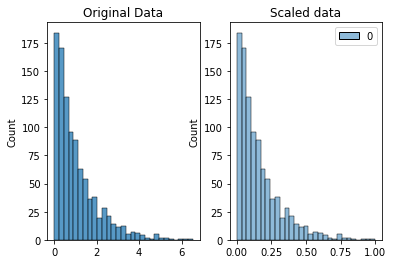

In [11]:
# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.histplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

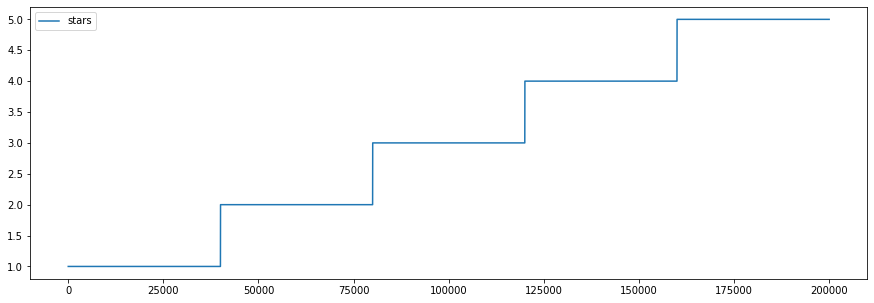

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, dashes=False) # the standard style only supports dashes for the first 6 colours.